In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
df = pd.read_csv("clients.csv")

In [141]:
df

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,12,18500,6,32,male,Higher education,Cell phones,1,2,46000,Another,1,1,0
1719,12,6500,6,24,male,Secondary special education,Cell phones,0,2,18000,Another,0,1,0
1720,12,5500,12,21,male,Incomplete higher education,Cell phones,0,2,15000,Another,1,1,0
1721,12,30500,10,25,female,Incomplete higher education,Cell phones,0,2,41000,Another,2,1,1


In [142]:
df.columns

Index(['month', 'credit_amount', 'credit_term', 'age', 'sex', 'education',
       'product_type', 'having_children_flg', 'region', 'income',
       'family_status', 'phone_operator', 'is_client', 'bad_client_target'],
      dtype='object')

In [143]:
df.drop(['having_children_flg','region','phone_operator','is_client', 'bad_client_target','product_type'],inplace = True, axis = 1)

In [144]:
df

,month,credit_amount,credit_term,age,sex,education,income,family_status
0,1,7000,12,39,male,Secondary special education,21000,Another
1,1,19000,6,20,male,Secondary special education,17000,Another
2,1,29000,12,23,female,Secondary special education,31000,Another
3,1,10000,12,30,male,Secondary special education,31000,Unmarried
4,1,14500,12,25,female,Higher education,26000,Married
...,...,...,...,...,...,...,...,...
1718,12,18500,6,32,male,Higher education,46000,Another
1719,12,6500,6,24,male,Secondary special education,18000,Another
1720,12,5500,12,21,male,Incomplete higher education,15000,Another
1721,12,30500,10,25,female,Incomplete higher education,41000,Another


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          1723 non-null   int64 
 1   credit_amount  1723 non-null   int64 
 2   credit_term    1723 non-null   int64 
 3   age            1723 non-null   int64 
 4   sex            1723 non-null   object
 5   education      1723 non-null   object
 6   income         1723 non-null   int64 
 7   family_status  1723 non-null   object
dtypes: int64(5), object(3)
memory usage: 107.8+ KB


In [146]:
df_numeric = df[['month','credit_amount','credit_term','age','income']]
df_categorical = df[['sex','education','family_status']]

In [147]:
df_numeric.count()

month            1723
credit_amount    1723
credit_term      1723
age              1723
income           1723
dtype: int64

In [148]:
df_numeric.isna().sum()

month            0
credit_amount    0
credit_term      0
age              0
income           0
dtype: int64

In [149]:
df_numeric.nunique()

month             12
credit_amount    205
credit_term       22
age               66
income            76
dtype: int64

In [150]:
df_numeric.describe()

,month,credit_amount,credit_term,age,income
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,6.708067,29264.654672,11.546721,35.911782,32652.350551
std,3.538420,27926.778301,6.548354,13.120203,20913.193158
min,1.000000,5000.000000,3.000000,18.000000,1000.000000
25%,3.000000,13000.000000,6.000000,26.000000,21000.000000
50%,7.000000,21500.000000,12.000000,32.000000,27000.000000
75%,10.000000,34000.000000,12.000000,44.000000,38000.000000
max,12.000000,301000.000000,36.000000,90.000000,401000.000000


In [151]:
df_numeric.median()

month                7.0
credit_amount    21500.0
credit_term         12.0
age                 32.0
income           27000.0
dtype: float64

In [152]:
df_categorical.count()

sex              1723
education        1723
family_status    1723
dtype: int64

In [153]:
df_categorical.isna().sum()

sex              0
education        0
family_status    0
dtype: int64

In [154]:
df_categorical.nunique()

sex              2
education        6
family_status    3
dtype: int64

In [155]:
df_categorical['sex'].value_counts()

male      931
female    792
Name: sex, dtype: int64

In [156]:
first_mode = df_categorical['sex'].value_counts().index.tolist()[0]
second_mode = df_categorical['sex'].value_counts().index.tolist()[1] 

In [157]:
(df_categorical[df_categorical['sex'] == first_mode].count() / df_categorical['sex'].count() * 100)['sex']

54.03366221706326

In [158]:
(df_categorical[df_categorical['sex'] == second_mode].count() / df_categorical['sex'].count() * 100)['sex']

45.96633778293674

In [159]:
df_categorical['education'].value_counts()

Secondary special education       836
Higher education                  585
Secondary education               208
Incomplete higher education        86
Incomplete secondary education      5
PhD degree                          3
Name: education, dtype: int64

In [160]:
first_mode = df_categorical['education'].value_counts().index.tolist()[0]
second_mode = df_categorical['education'].value_counts().index.tolist()[1] 

In [161]:
(df_categorical[df_categorical['education'] == first_mode].count() / df_categorical['education'].count() * 100)['education']

48.52002321532211

In [162]:
(df_categorical[df_categorical['education'] == second_mode].count() / df_categorical['education'].count() * 100)['education']

33.95240858966918

In [163]:
df_categorical['family_status'].value_counts()

Another      1201
Married       444
Unmarried      78
Name: family_status, dtype: int64

In [164]:
first_mode = df_categorical['family_status'].value_counts().index.tolist()[0]
second_mode = df_categorical['family_status'].value_counts().index.tolist()[1] 

In [165]:
(df_categorical[df_categorical['family_status'] == first_mode].count() / df_categorical['family_status'].count() * 100)['family_status']

69.70400464306442

In [166]:
(df_categorical[df_categorical['family_status'] == second_mode].count() / df_categorical['family_status'].count() * 100)['family_status']

25.76900754497969

In [167]:
df.columns

Index(['month', 'credit_amount', 'credit_term', 'age', 'sex', 'education',
       'income', 'family_status'],
      dtype='object')

In [168]:
bins =round(1+3.22*np.log(1723))
bins

25

Text(0.5, 1.0, 'month')

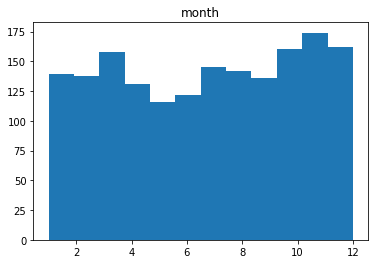

In [169]:
plt.hist(df['month'],bins = 12)
plt.title("month")

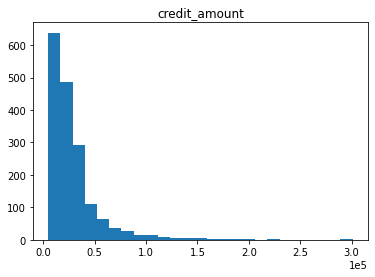

In [170]:
plt.hist(df['credit_amount'],bins = bins)
plt.title("credit_amount")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [171]:
df = df[df['credit_amount'] < 120000]

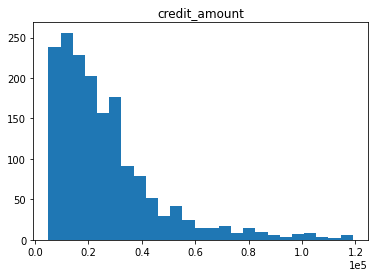

In [172]:
plt.hist(df['credit_amount'], bins = bins)
plt.title("credit_amount")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

Text(0.5, 1.0, 'credit_term')

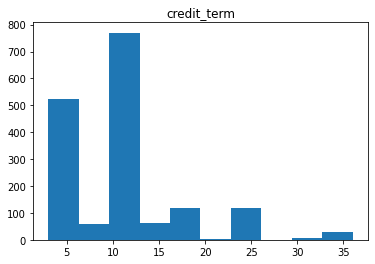

In [173]:
plt.hist(df['credit_term'])
plt.title("credit_term")

In [174]:
df = df[df['credit_term'] < 27]

Text(0.5, 1.0, 'credit_term')

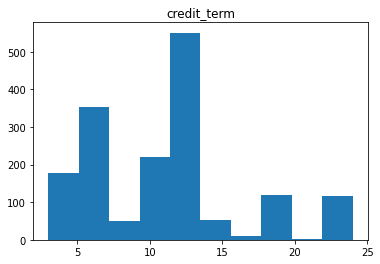

In [175]:
plt.hist(df['credit_term'])
plt.title("credit_term")

Text(0.5, 1.0, 'age')

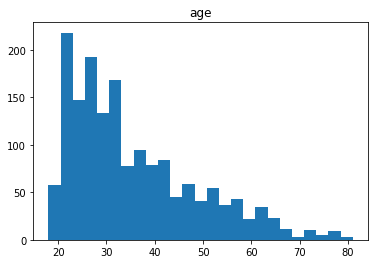

In [176]:
plt.hist(df['age'],bins = bins)
plt.title("age")

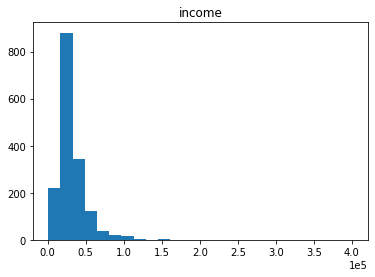

In [177]:
plt.hist(df['income'],bins = bins)
plt.title("income")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [178]:
df = df[df['income'] < 110000]

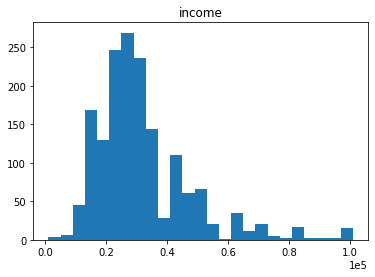

In [179]:
plt.hist(df['income'],bins = bins)
plt.title("income")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

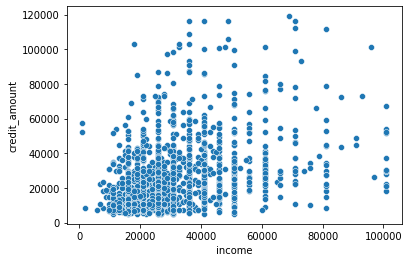

In [180]:
sns.scatterplot(data=df, x="income", y="credit_amount")

In [181]:
df[["income","credit_amount"]].corr()

,income,credit_amount
income,1.000000,0.354562
credit_amount,0.354562,1.000000


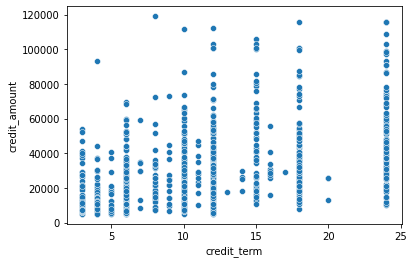

In [182]:
sns.scatterplot(data=df, x="credit_term", y="credit_amount")

In [183]:
df[["credit_term","credit_amount"]].corr()

,credit_term,credit_amount
credit_term,1.00000,0.47365
credit_amount,0.47365,1.00000


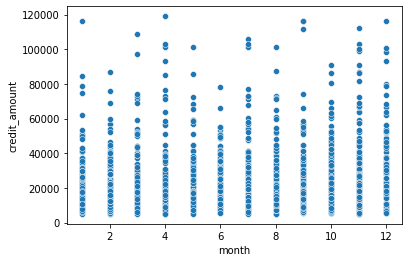

In [184]:
sns.scatterplot(data=df, x="month", y="credit_amount")

In [185]:
df[["month","credit_amount"]].corr()

,month,credit_amount
month,1.000000,0.064397
credit_amount,0.064397,1.000000


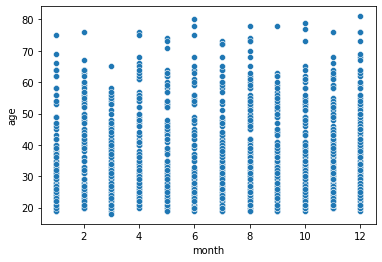

In [186]:
sns.scatterplot(data=df, x="month", y="age")

In [187]:
df[["month","age"]].corr()

,month,age
month,1.000000,0.022718
age,0.022718,1.000000


,month,credit_amount,credit_term,age,income
month,1.000000,0.064397,0.003296,0.022718,0.076629
credit_amount,0.064397,1.000000,0.473650,0.105104,0.354562
credit_term,0.003296,0.473650,1.000000,-0.005842,0.043883
age,0.022718,0.105104,-0.005842,1.000000,-0.093361
income,0.076629,0.354562,0.043883,-0.093361,1.000000


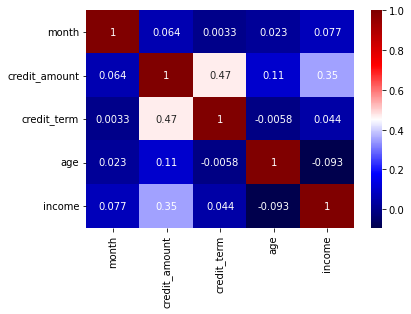

In [188]:
corr = df.corr()
sns.heatmap(corr,cmap = 'seismic',annot = True)
corr

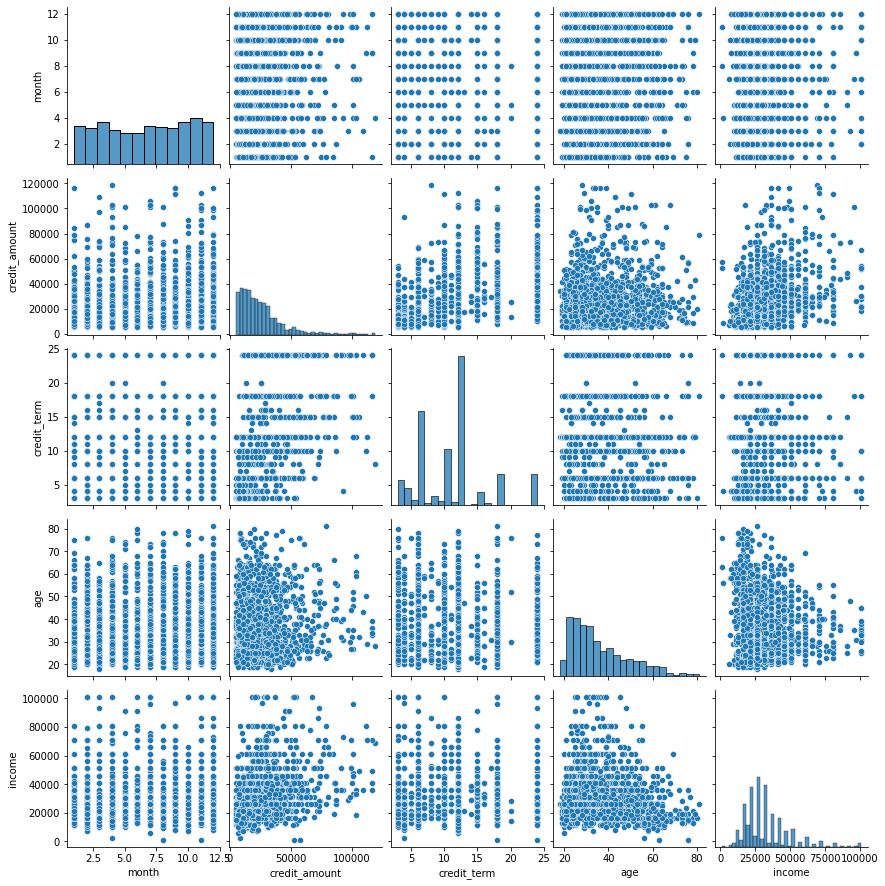

In [189]:
sns.pairplot(df)

Text(0.5, 1.0, 'sex')

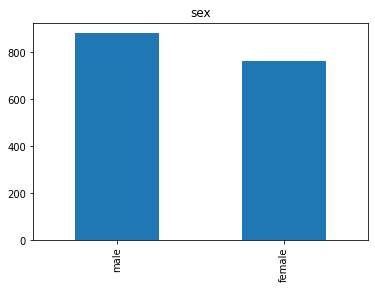

In [190]:
df['sex'].value_counts().plot(kind='bar')
plt.title("sex")

Text(0.5, 1.0, 'education')

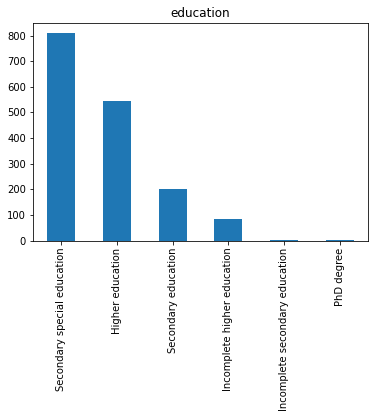

In [191]:
df['education'].value_counts().plot(kind='bar')
plt.title("education")

Text(0.5, 1.0, 'family_status')

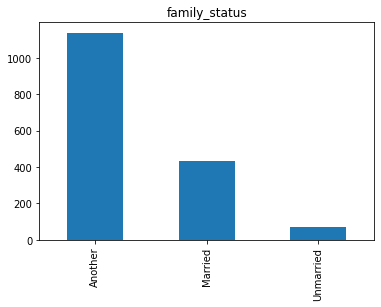

In [192]:
df['family_status'].value_counts().plot(kind='bar')
plt.title("family_status")

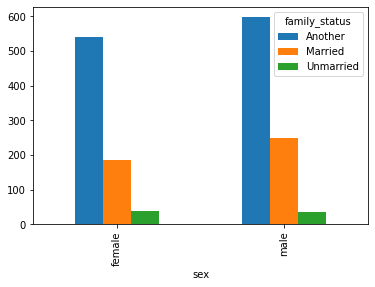

In [193]:
df_cat=pd.crosstab(index=df['sex'],columns=df['family_status'])
df_cat.plot.bar()

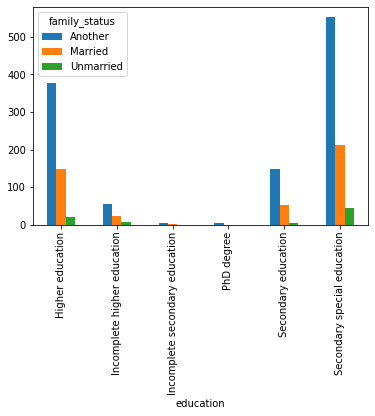

In [194]:
df_cat=pd.crosstab(index=df['education'],columns=df['family_status'])
df_cat.plot.bar()

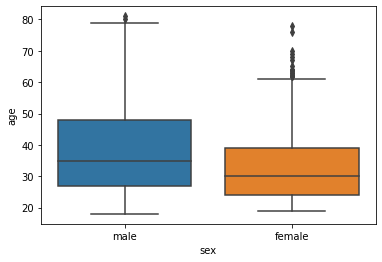

In [195]:
sns.boxplot(data = df, x = 'sex', y = 'age')

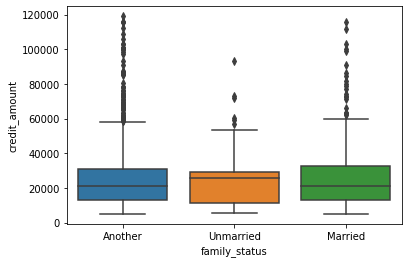

In [196]:
sns.boxplot(data = df, x = 'family_status', y = 'credit_amount')

In [197]:
covMatrix = pd.DataFrame.cov(df_numeric)
covMatrix

,month,credit_amount,credit_term,age,income
month,12.520417,4.359827e+03,0.752614,0.865056,4.789275e+03
credit_amount,4359.826539,7.799049e+08,90895.874157,45000.132120,2.178432e+08
credit_term,0.752614,9.089587e+04,42.880946,4.415855,3.804579e+03
age,0.865056,4.500013e+04,4.415855,172.139716,-1.914973e+04
income,4789.275451,2.178432e+08,3804.579431,-19149.734446,4.373616e+08


In [198]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [199]:
for col in df_numeric:
  min = df_numeric[col].min()
  max = df_numeric[col].max()
  new_col = []
  for data in df_numeric[col]:
    data = (data - min)/(np.abs(max-min))
    new_col.append(data)
  df_numeric[col] = new_col

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [207]:
df_numeric

,month,credit_amount,credit_term,age,income
0,0.0,0.006757,0.272727,0.291667,0.0500
1,0.0,0.047297,0.090909,0.027778,0.0400
2,0.0,0.081081,0.272727,0.069444,0.0750
3,0.0,0.016892,0.272727,0.166667,0.0750
4,0.0,0.032095,0.272727,0.097222,0.0625
...,...,...,...,...,...
1718,1.0,0.045608,0.090909,0.194444,0.1125
1719,1.0,0.005068,0.090909,0.083333,0.0425
1720,1.0,0.001689,0.272727,0.041667,0.0350
1721,1.0,0.086149,0.212121,0.097222,0.1000


In [201]:
'''
le = LabelEncoder()
col = df_categorical.columns
d = df_categorical
for col in ['sex','education','family_status']:
   df_categorical[col] = le.fit_transform(df_categorical[col])
'''

for col in df_categorical:
  count = 0
  d = {}
  new_col = []
  for data in df_categorical[col]:
    if data not in d:
      d.setdefault(data,count)
      count = count + 1
      new_col.append(d[data])
    else:
      new_col.append(d[data])
  df_categorical[col] = new_col

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [202]:
df_categorical

,sex,education,family_status
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,1
4,1,1,2
...,...,...,...
1718,0,1,0
1719,0,0,0
1720,0,2,0
1721,1,2,0


In [203]:
df = pd.concat([df_numeric, df_categorical], axis=1)

In [204]:
df

,month,credit_amount,credit_term,age,income,sex,education,family_status
0,0.0,0.006757,0.272727,0.291667,0.0500,0,0,0
1,0.0,0.047297,0.090909,0.027778,0.0400,0,0,0
2,0.0,0.081081,0.272727,0.069444,0.0750,1,0,0
3,0.0,0.016892,0.272727,0.166667,0.0750,0,0,1
4,0.0,0.032095,0.272727,0.097222,0.0625,1,1,2
...,...,...,...,...,...,...,...,...
1718,1.0,0.045608,0.090909,0.194444,0.1125,0,1,0
1719,1.0,0.005068,0.090909,0.083333,0.0425,0,0,0
1720,1.0,0.001689,0.272727,0.041667,0.0350,0,2,0
1721,1.0,0.086149,0.212121,0.097222,0.1000,1,2,0


In [205]:
df['education'].value_counts()

0    836
1    585
3    208
2     86
4      5
5      3
Name: education, dtype: int64